In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("adult_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Adult Barrier,Missing Rows
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


# Preliminary Analysis

In [3]:
df.shape

(48842, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-Num   48842 non-null  int64 
 5   Marital-Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-Gain    48842 non-null  int64 
 11  Capital-Loss    48842 non-null  int64 
 12  Hours-Per-Week  48842 non-null  int64 
 13  Native-Country  48842 non-null  object
 14  Adult Barrier   48842 non-null  object
 15  Missing Rows    3620 non-null   object
dtypes: int64(6), object(10)
memory usage: 6.0+ MB


# Checking for Duplicates:

In [5]:
print("Number of Duplicate Records-",df[df.duplicated()].shape[0])
data= df.drop_duplicates().reset_index(drop=True)
data.shape

Number of Duplicate Records- 29


(48813, 16)

In [6]:
df.nunique()

Age                  74
Workclass             9
Fnlwgt            28523
Education            16
Education-Num        16
Marital-Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital-Gain        123
Capital-Loss         99
Hours-Per-Week       96
Native-Country       42
Adult Barrier         4
Missing Rows          1
dtype: int64

In [292]:
df.describe()

,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [293]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,Workclass,Education,Marital-Status,Occupation,Relationship,Race,Sex,Native-Country,Adult Barrier,Missing Rows
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,3620
unique,9,16,7,15,6,5,2,42,4,1
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K,Missing
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720,3620


# Value Count Function

In [294]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country',
       'Adult Barrier', 'Missing Rows'],
      dtype='object')

In [295]:
df['Workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64

In [296]:
df['Native-Country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [297]:
df['Occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: Occupation, dtype: int64

Here in Occupation , there are around '2809' rows with '?'.As there
are so many records, we cannot drop them. So, we can replace with
'Prof-speciality', as it has highest rows compared to other values.

In [298]:
df['Adult Barrier'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: Adult Barrier, dtype: int64

# Data Pre-processing

# Filling ? values

In [4]:
df['Workclass'] = df['Workclass'].replace(' ?', ' Private')
df['Occupation'] = df['Occupation'].replace(' ?', ' Prof-specialty')
df['Native-Country'] = df['Native-Country'].replace(' ?', ' United-States')

In [5]:
df.head(31)

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Adult Barrier,Missing Rows
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,NaN
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,NaN
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,NaN
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,NaN
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,NaN


# Replacing Values

In [6]:
#Education Category
df.Education= df.Education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'School')
df.Education = df.Education.replace(' HS-grad', 'High school')
df.Education = df.Education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'Higher')
df.Education = df.Education.replace(' Bachelors', 'Undergrad')
df.Education = df.Education.replace(' Masters', 'Grad')
df.Education = df.Education.replace(' Doctorate', 'Doc')

In [7]:
#marital status
df['Marital-Status']= df['Marital-Status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Married')
df['Marital-Status']= df['Marital-Status'].replace([' Never-married'], 'Not-Married')
df['Marital-Status']= df['Marital-Status'].replace([' Divorced', ' Separated',' Widowed',
                                                   ' Married-spouse-absent'], 'Other')

In [8]:
#income
df['Adult Barrier'] = df['Adult Barrier'].replace([' <=50K', ' <=50K.'], '0')
df['Adult Barrier']=df['Adult Barrier'].replace([' >50K.',' >50K'],'1')

In [9]:
print(df['Marital-Status'].value_counts())

Married        22416
Not-Married    16117
Other          10309
Name: Marital-Status, dtype: int64


In [10]:
from sklearn.preprocessing import OneHotEncoder
ohecol = ['Education','Marital-Status','Workclass','Occupation','Race' ]
oe_df = pd.get_dummies(df[ohecol],  prefix = ['Education','Marital-Status','Workclass','Occupation','Race' ])
oe_df.shape

(48842, 36)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Native-Country']=le.fit_transform(df['Native-Country'])

In [12]:
final_df=df.join(oe_df)

In [13]:
final_df

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,...,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,39,State-gov,77516,Undergrad,13,Not-Married,Adm-clerical,1,White,1,...,0,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Undergrad,13,Married,Exec-managerial,0,White,1,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,215646,High school,9,Other,Handlers-cleaners,1,White,1,...,0,0,0,0,0,0,0,0,0,1
3,53,Private,234721,School,7,Married,Handlers-cleaners,0,Black,1,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Undergrad,13,Married,Prof-specialty,5,Black,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Undergrad,13,Other,Prof-specialty,1,White,0,...,1,0,0,0,0,0,0,0,0,1
48838,64,Private,321403,High school,9,Other,Prof-specialty,2,Black,1,...,1,0,0,0,0,0,0,1,0,0
48839,38,Private,374983,Undergrad,13,Married,Prof-specialty,0,White,1,...,1,0,0,0,0,0,0,0,0,1
48840,44,Private,83891,Undergrad,13,Other,Adm-clerical,3,Asian-Pac-Islander,1,...,0,0,0,0,0,0,1,0,0,0


# Dropping Columns

In [14]:
final_df.drop(columns=['Education-Num','Workclass','Education','Occupation','Race','Marital-Status','Fnlwgt','Capital-Gain','Capital-Loss','Missing Rows','Native-Country','Relationship'],inplace=True)

In [15]:
final_df

,Age,Sex,Hours-Per-Week,Adult Barrier,Education_Doc,Education_Grad,Education_High school,Education_Higher,Education_School,Education_Undergrad,...,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,39,1,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,50,1,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53,1,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,36,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
48838,64,1,40,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
48839,38,1,50,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
48840,44,1,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection Using Chi - Square Test 

In [64]:
categ_columns=['Workclass','Education', 'Marital-Status','Occupation','Relationship','Race','Sex','Native-Country']

In [65]:
import scipy.stats
from scipy.stats import chi2_contingency
g, p, dof, e = scipy.stats.chi2_contingency([[56, 891], [48, 12873]], correction=True)


In [294]:
li_significant=[]
def calculate_chisquare_test_statistic(feature ,table):
    # contingency table
#     print(table)
    stat, p, dof, expected = chi2_contingency(table)
#     print('dof=%d' % dof)
#     print(expected)
    # interpret p-value
    alpha = 0.05
    if p <= alpha:
        print('Dependent (reject H0)')
        li_significant.append(feature)
    else:
        print('Independent (fail to reject H0)')
for each_col in categ_columns:
    print(each_col)
    table= pd.crosstab(data[each_col],data['Adult Barrier'])
    calculate_chisquare_test_statistic(each_col, table)

Workclass
Dependent (reject H0)
Education
Dependent (reject H0)
Marital-Status
Dependent (reject H0)
Occupation
Dependent (reject H0)
Relationship
Dependent (reject H0)
Race
Dependent (reject H0)
Sex
Dependent (reject H0)
Native-Country
Dependent (reject H0)


In [311]:
df.corr()

,Age,Fnlwgt,Education-Num,Relationship,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country
Age,1.000000,-0.076628,0.030940,-0.263383,0.088120,0.077229,0.056944,0.071558,-0.002622
Fnlwgt,-0.076628,1.000000,-0.038761,0.009092,0.027739,-0.003706,-0.004366,-0.013519,-0.058534
Education-Num,0.030940,-0.038761,1.000000,-0.090534,0.009328,0.125146,0.080972,0.143689,0.090137
Relationship,-0.263383,0.009092,-0.090534,1.000000,-0.579797,-0.056510,-0.057201,-0.250400,-0.006999
Sex,0.088120,0.027739,0.009328,-0.579797,1.000000,0.047094,0.045480,0.228560,-0.002453
Capital-Gain,0.077229,-0.003706,0.125146,-0.056510,0.047094,1.000000,-0.031441,0.082157,0.007919
Capital-Loss,0.056944,-0.004366,0.080972,-0.057201,0.045480,-0.031441,1.000000,0.054467,0.006523
Hours-Per-Week,0.071558,-0.013519,0.143689,-0.250400,0.228560,0.082157,0.054467,1.000000,0.006497
Native-Country,-0.002622,-0.058534,0.090137,-0.006999,-0.002453,0.007919,0.006523,0.006497,1.000000


In [ ]:
#fig.suptitle("Count plot for various features")
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.countplot(data=df,x='Race')

<AxesSubplot:>

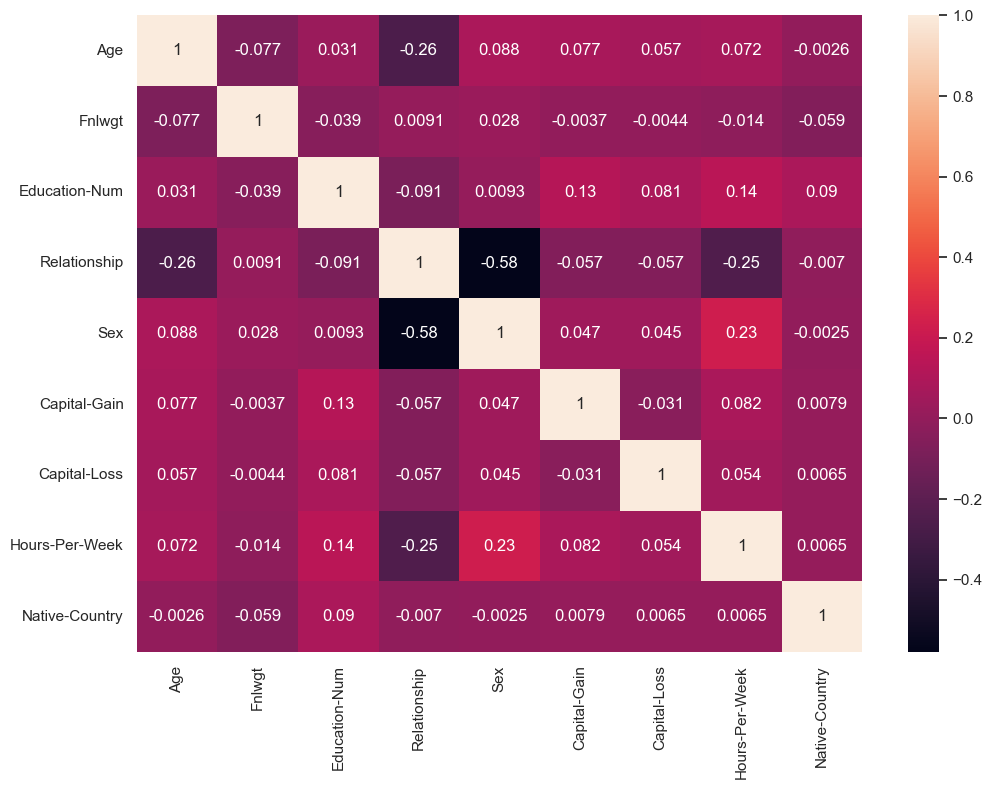

In [312]:
sns.heatmap(df.corr(),annot=True)

# Feature Scaling

In [313]:
X= final_df.drop(['Adult Barrier'], axis=1)
Y= final_df['Adult Barrier']

In [314]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [315]:
df1= final_df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Sex,Hours-Per-Week,Adult Barrier,Education_Doc,Education_Grad,Education_High school,Education_Higher,Education_School,Education_Undergrad,...,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,22,1,39,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,33,1,12,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,21,1,39,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36,1,39,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,11,0,39,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [316]:
ss= StandardScaler().fit(df1.drop('Adult Barrier', axis=1))
X= ss.transform(df1.drop('Adult Barrier', axis=1))
Y= df['Adult Barrier']

In [317]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression()

# K Nearest Neighbors
knn = KNeighborsClassifier()

# Random Forest
ran_forest = RandomForestClassifier()

log_reg.fit(X_train, Y_train)

log_reg.score(X_test, Y_test)

0.8381218863031461

In [318]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

# Logistic Regression

In [319]:
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [320]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8490156681063239
Best parameters set:
C:0.01
penalty:l2


In [321]:
best_LR_model = Grid_LR.best_estimator_
best_LR_model.predict(X_test)
best_LR_model.score(X_test, Y_test)

0.8383948679451307

# KNN

In [322]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, Y_train)
print_grid_search_metrics(Grid_KNN)

Best score: 0.8407967623476393
Best parameters set:
n_neighbors:9


In [325]:
best_KNN_model = Grid_KNN.best_estimator_

# Random Forest Classifier

In [326]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [327]:
print_grid_search_metrics(Grid_RF)

Best score: 0.863786552216205
Best parameters set:
max_depth:10
n_estimators:100


In [328]:
best_RF_model = Grid_RF.best_estimator_

In [329]:
print(best_LR_model)
print(best_KNN_model)
print(best_RF_model)

LogisticRegression(C=0.01, solver='liblinear')
KNeighborsClassifier(n_neighbors=9)
RandomForestClassifier(max_depth=10)


# Model Evaluation

In [330]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(Y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(Y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(Y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.855114993516686
precision is: 0.7878542510121458
recall is: 0.5489421720733427

Logistic Regression
Accuracy is: 0.8383948679451307
precision is: 0.7092072520440811
recall is: 0.5627644569816643

K nearest neighbor
Accuracy is: 0.833344707568416
precision is: 0.6807604064241233
recall is: 0.5858956276445698

